# Visualización de Datos de Ventas al por Menor

Este notebook se utiliza para visualizar los resultados del análisis de ventas al por menor. Se emplearán gráficos para representar las tendencias y patrones en los datos.

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las visualizaciones
sns.set(style='whitegrid')

# Cargar los datos
ruta_archivo = '../data/retail_sales_dataset.csv'
datos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del conjunto de datos
datos.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [28]:
# Ejecuta esta celda para ver las columnas disponibles
print(datos.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [29]:
# Comprueba si el DataFrame tiene datos
print(f"Forma del DataFrame: {datos.shape}")
print("Primeras 5 filas:")
print(datos.head())

Forma del DataFrame: (1000, 9)
Primeras 5 filas:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


## Gráfico de Ventas Totales por Categoría

A continuación, se mostrará un gráfico de barras que representa las ventas totales por categoría.

In [30]:
# Muestra los nombres exactos de las columnas
for col in datos.columns:
    print(f"'{col}'")

'Transaction ID'
'Date'
'Customer ID'
'Gender'
'Age'
'Product Category'
'Quantity'
'Price per Unit'
'Total Amount'


In [31]:
# Información detallada del DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


C:\Users\anali\AppData\Local\Temp\ipykernel_29560\1663172220.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Amount', y='Product Category', data=ventas_por_categoria, palette='viridis')


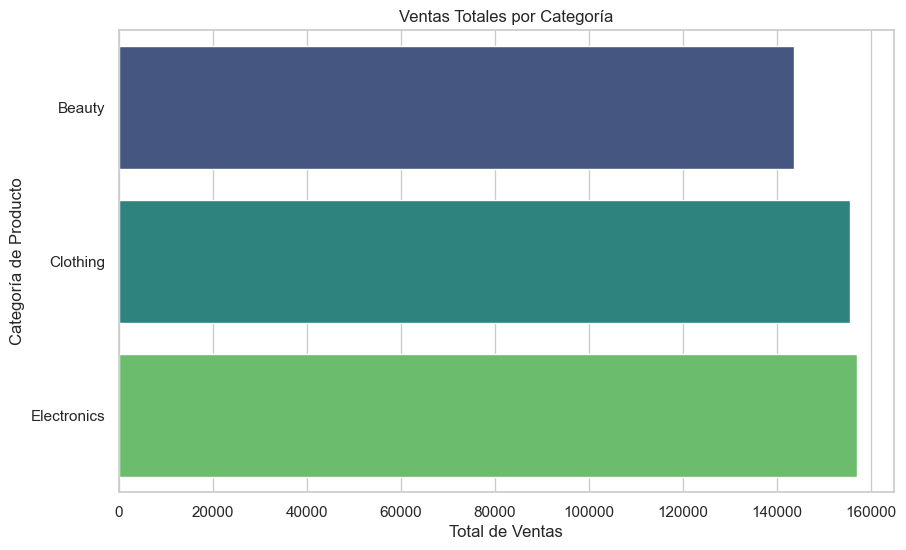

In [33]:
# Corrección usando los nombres exactos de columnas que aparecen en datos.info()
ventas_por_categoria = datos.groupby('Product Category')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Product Category', data=ventas_por_categoria, palette='viridis')
plt.title('Ventas Totales por Categoría')
plt.xlabel('Total de Ventas')
plt.ylabel('Categoría de Producto')
plt.show()

## Gráfico de Tendencia de Ventas Diarias

Este gráfico mostrará la tendencia de las ventas a lo largo del tiempo.

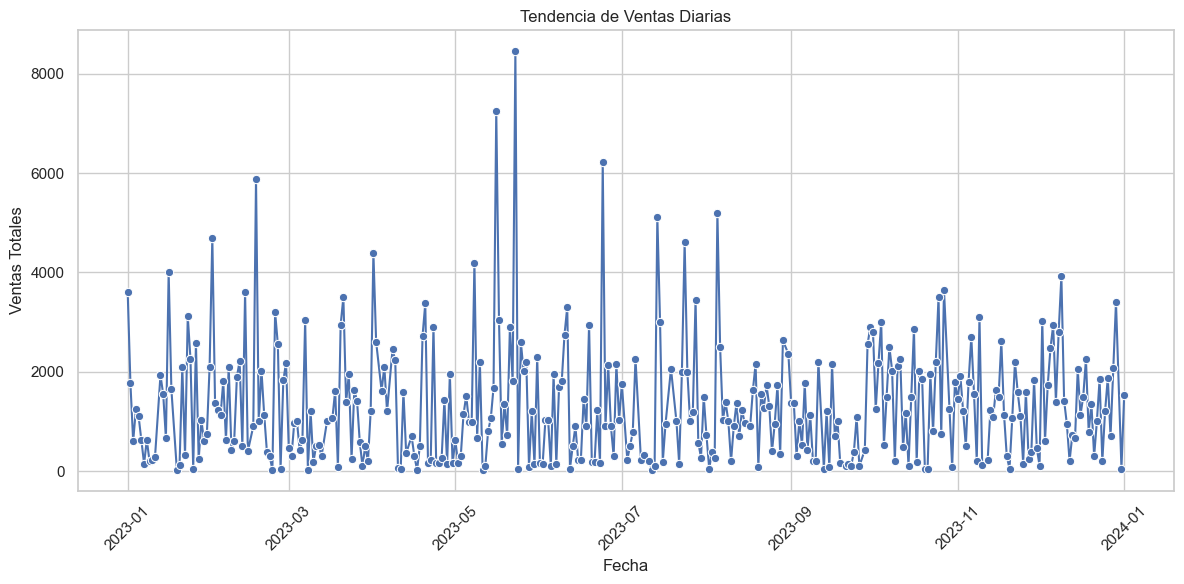

In [34]:
# Convertir la columna de fecha al formato datetime
datos['Date'] = pd.to_datetime(datos['Date'])

# Agrupar por fecha y sumar los montos totales
ventas_diarias = datos.groupby('Date')['Total Amount'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Amount', data=ventas_diarias, marker='o')
plt.title('Tendencia de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Para evitar que las etiquetas se corten
plt.show()